# Table of Contents

* [Introduction](#Introduction)
* [Meta-data](#Meta_data)
* [Exploratory Data Analysis (EDA)](#Exploratory_Data_Analysis)
    * [Importing libraries](#Importing_libraries)
    * [Descriptive Statistics](#Descriptive_Statistics)
    * [Missing value imputation](#Missing_value_imputation)
    * [Graphical representation](#Graphical_representation)
    * [End Notes](#End_Notes)
* [Data Preprocessing](#Data_Prepossesing)
    * [Duplicates](#Duplicates)
    * [Missing Data](#Missing_Data)
    * [Outliers treatment](#Outliers_Treatment)
    * [Scaling](#Scaling)

## Introduction <a class="anchor" id="Introduction"></a>

Vous êtes développeur AI dans une startup de la Silicon Valley qui fournit des services dans le domaine de l'investissement immobilier.
Les chargés de relation client ont mentionné que la demande a augmenté récemment et qu'il devient difficile de faire des estimations personnalisées.
De ce fait, l'entreprise vous a confier d'automatiser cette tâche avec un modèle prédictif.
Pour cela, vous avez récupéré une base de données qui contient les prix médians des logements pour les districts de Californie issus du recensement de 1990

## Metadata <a class="anchor" id="Meta_data"></a>

`longitude`
`latitude`
`housingMedianAge` | Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
`totalRooms` | Nombre total de chambres dans un bloc
`totalBedrooms` |  Nombre total de chambres de lit dans un bloc
`population` Nombre total de personnes résidant dans un bloc
`households`| Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
`medianIncome` | Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
`medianHouseValue` | Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
`oceanProximity` | Situation de la maison par rapport à la mer

## Exploratory Data Analysis (EDA) <a class="anchor" id="Exploratory_Data_Analysis"></a>

EDA is the process of investigating the dataset to discover patterns, and anomalies (outliers), and form hypotheses based on our understanding of the dataset.
EDA involves generating summary statistics for numerical data in the dataset and creating various graphical representations to understand the data better.

### Importing Libraries <a class="anchor" id="Importing_Libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading data

In [2]:
df = pd.read_csv('../data/data_raw.csv')
df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
#dropping 'Unnamed: 0' column
df_fltd = df.drop(['Unnamed: 0'], axis=1)

### Descriptive Statistics <a class="anchor" id="Descriptive_Statistics"></a>

In [4]:
df_fltd.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7312
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453,NaN
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661,NaN
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,NaN
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000,NaN
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000,NaN
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000,NaN


In [5]:
df_fltd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [6]:
#converting median_income to a dollar unit instead of a ten thousand dollar unit
ten_thousand_dollar_unit= 10000
df_fltd.median_income= df_fltd.median_income * ten_thousand_dollar_unit

#checking changes
df_fltd.median_income.head()

0    14817.0
1    69133.0
2    15536.0
3    15284.0
4    40815.0
Name: median_income, dtype: float64

### Missing value Interpolation

In [7]:
#checking if there are any missing values
df_fltd.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

We have 176 total_bedrooms feauture rows which are null, so we could either drop those rows with no such an impact since they represent only 1% of dataset's instances or replacing them by performing a linear interpolation.

In this case we'll try an interpolation.

In [8]:
df_fltd= df_fltd.interpolate()

In [9]:
#checking if missing instances values have been interpolated correctly
df_fltd.total_bedrooms.isnull().sum()

0

### Data Distribution

#### Multivariate analysis

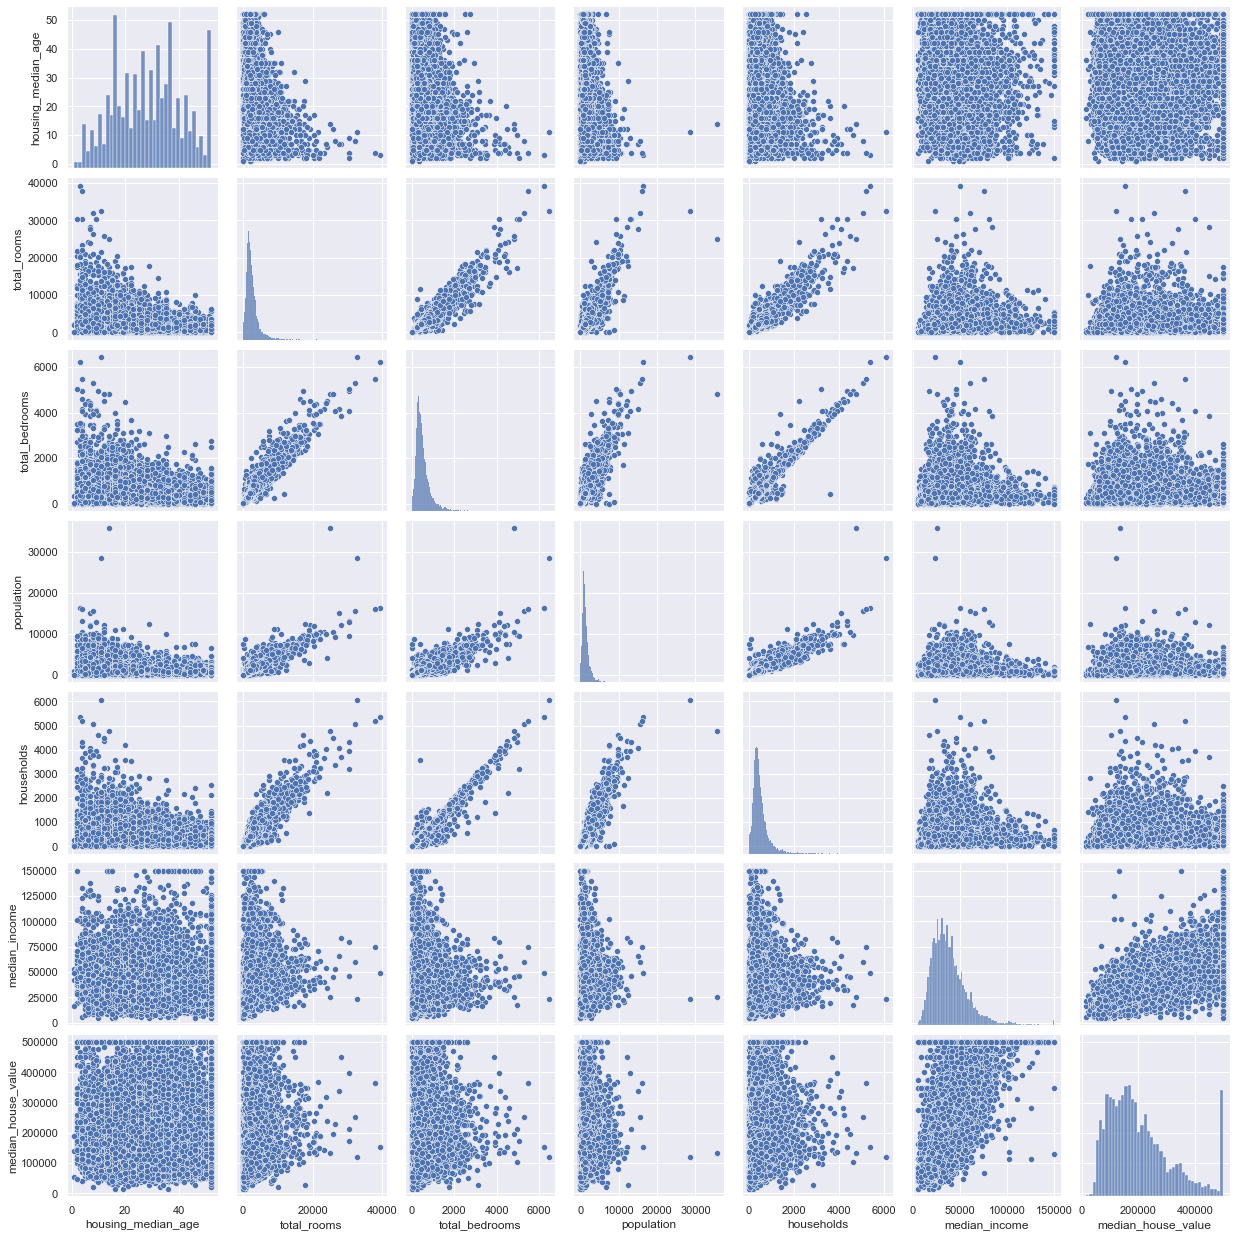

In [10]:
#set dark theme
sns.set(style="darkgrid")

# plotting all features distribution without lat, long, and ocean-proximity(categorical feature)
sns.pairplot(df_fltd.iloc[:, 2:9])

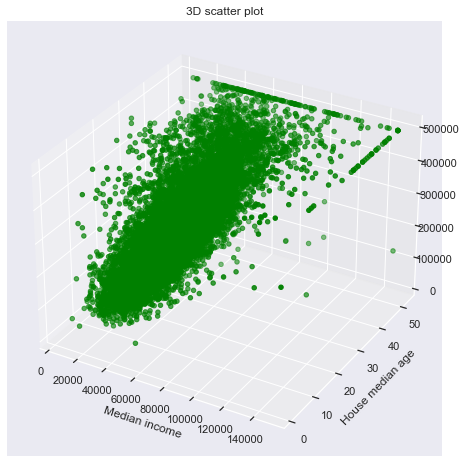

In [11]:
# Import dedicated library
from mpl_toolkits import mplot3d

# Creating datasets
x = df_fltd.median_income
y = df_fltd.housing_median_age
z = df_fltd.median_house_value

# Creating figure
fig = plt.figure(figsize = (10, 8))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(x, y, z, color = "green")
plt.title("3D scatter plot")
plt.xlabel('Median income')
plt.ylabel('House median age')

# show plot
plt.show()

### End Notes

**Multivariate analysis**

It's seems like there are significant positive correlations between the total_bedrooms and households, the same goes for total_rooms and households, which is quite obvious, since an increase of households will point out an increase of rooms/bedrooms per property.

We could notice a positive correlation between the households and the population as well, which is as we said before rational, since population increase will impact households as well.

**3D Scatter Plot**

`Z-axis` | Mediane_house_income (Target)

As we could glimpse, there is a double correlation between the target feature named 'house_median_value' which represents total property median value per district and houses median age/house median value corr.

We could deduct the house median value increases as the median income and median age increase as well.

## Data preprocessing <a class="anchor" id="Data-Prepocessing"></a>

### Duplicates <a class="anchor" id="Duplicates"></a>

In [36]:
# Are there duplicated records? Are there genuinely duplicates or do you have to remove them?

X = df_fltd.drop(['median_house_value'], axis=1) # df without target feature

X[X.duplicated()]   # Shows records which are duplicated
len(X[X.duplicated()]) # count of records that are duplicated

0

There's no duplicates, fine.

### Missing data <a class="anchor" id="Missing_Data"></a>

Already replaced missing values by a linear interpolation (look at EDA)

### Outliers treatment <a class="anchor" id="Outliers_Treatment"></a>

#### Causes of outliers can be classified in two broad categories:

*Artificial (Error) / Non-natural*
*Natural*

<AxesSubplot:>

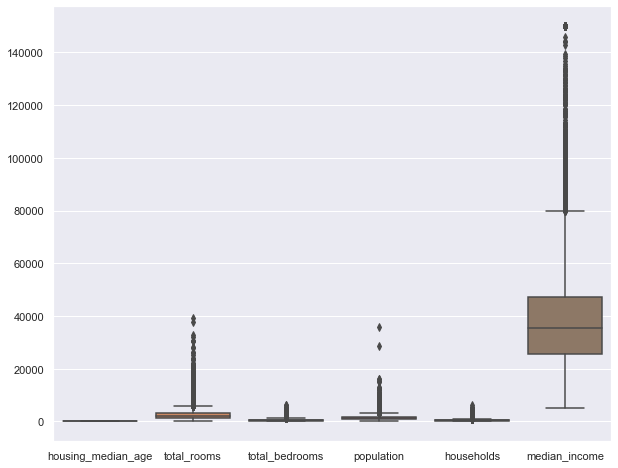

In [15]:
# box plot
plt.figure(figsize=(10, 8))
sns.boxplot(data=X.iloc[:, 2:])

It seems like there are no artificial/non-natural outliers given the context, thus we could presuppose those outliers are natural.

#### Correcting or removing?

We'll try to build a regression model with and w/out them, then we'll match models' scores to establish if we should transform or remove those outliers.

#### Data Distribution

### Data Imbalance

In [38]:
# dropping coordinates as well since they're geospatial features, which are irrelevant in terms of distribution as they are right now

X = X.drop(['ocean_proximity', 'longitude', 'latitude'], axis=1)

KeyError: "['ocean_proximity' 'longitude' 'latitude'] not found in axis"

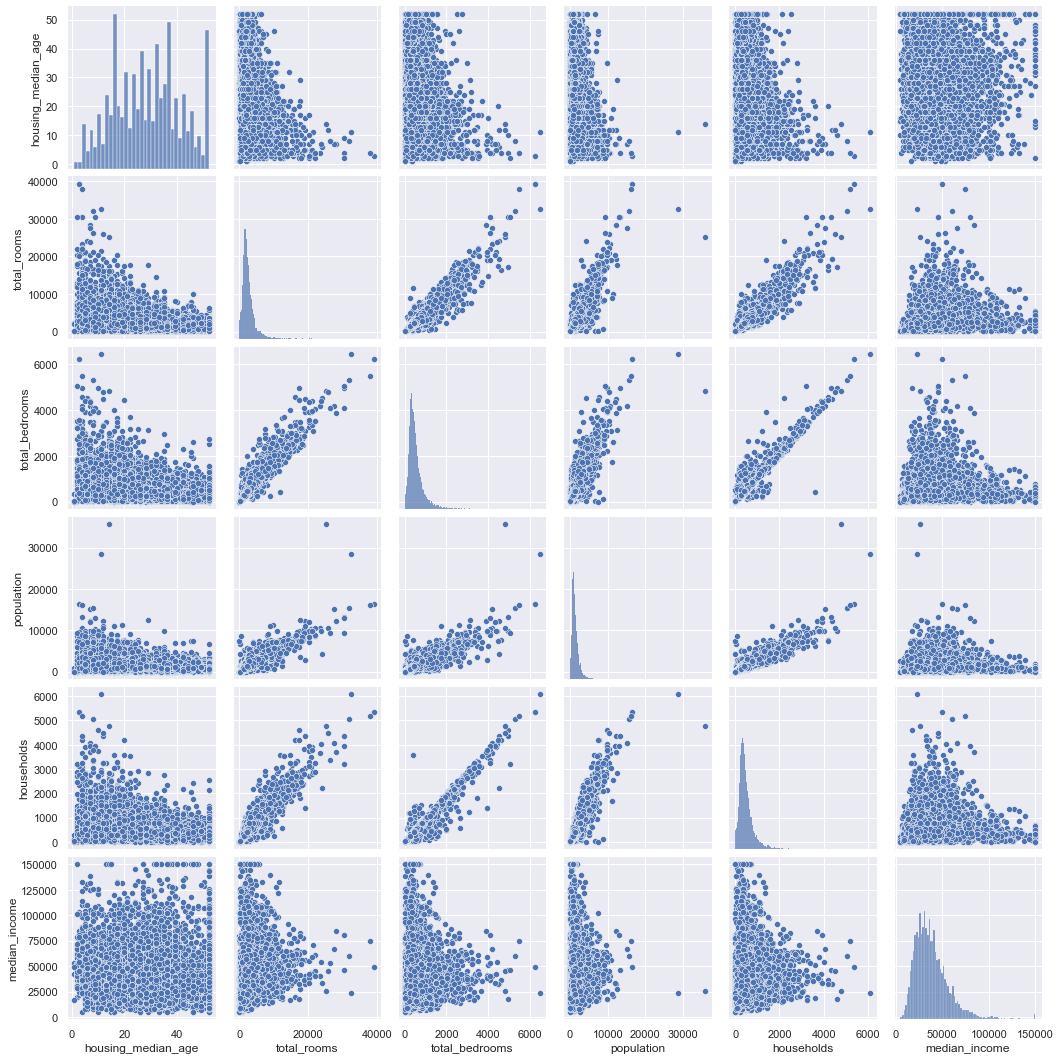

In [39]:
sns.pairplot(X)

### Scaling <a class="anchor" id="Scaling"></a>

*Does your data need scaling / normalizing across the feature lists?*
*What kind of scaling method would you do ? ( Standard Scaling / Min-Max Scaling?)*

- Our data needs to be scaled
- We would perform Standard Scaling method

In [29]:
#Using sklearn's StandardScaler package
from sklearn.preprocessing import MinMaxScaler

# dropping categorical ocean_proximity feature since it doesn't need to be standardized as it will be encoded by feature engineering encoding, as well as district geo coordinates (geospatial features), since they will not affect model's score as they are, so will perform reverse coding, which basically converts point coordinates to a readable address, in our case, into post codes.

X = X.drop(['ocean_proximity', 'longitude', 'latitude'], axis=1)

X_scaled = pd.DataFrame(MinMaxScaler().fit_transform(X),columns = X.columns)
X_scaled

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.098039,0.046981,0.073103,0.039071,0.068257,0.067709
1,0.137255,0.051534,0.053857,0.024076,0.055592,0.442297
2,0.470588,0.022104,0.032904,0.026010,0.034868,0.072668
3,0.588235,0.015669,0.035232,0.016648,0.037007,0.070930
4,0.392157,0.048736,0.057582,0.031587,0.060855,0.247003
...,...,...,...,...,...,...
16507,0.372549,0.037111,0.042837,0.020797,0.040789,0.176729
16508,0.941176,0.060004,0.077914,0.031615,0.075000,0.145750
16509,0.352941,0.064226,0.071240,0.033717,0.070230,0.275576
16510,0.745098,0.070458,0.130064,0.071274,0.126809,0.143108
